# 泰坦尼克号数据

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [55]:
data = pd.read_csv("../datasets/train.csv")

In [56]:
data.info()  #查看数据的详细信息，可以看到有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
data.head()  #显示前n行，默认前5行 data.head(n)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data = data.drop(['Cabin',"Name","Ticket"],inplace=False,axis=1)  
data["Age"] = data["Age"].fillna(data["Age"].mean()) #用均值去填补
data = data.dropna(axis=0)
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))
data.loc[:,"Sex"] = (data["Sex"] == "male").astype("int")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int32  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 66.0 KB


In [60]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [61]:
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

## 决策树

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.7415730337078652

0.8166624106230849


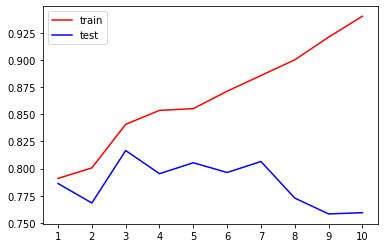

In [47]:
tr=[]
te=[]
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))#显示x轴1-10的标尺
plt.legend()
plt.show()

## 随机森林

In [62]:
Xtrain.shape

(622, 8)

In [63]:
Ytrain.shape

(622, 1)

In [64]:
import numpy as np
Ytrain1 = np.array(Ytrain)
Ytest1 = np.array(Ytest)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,random_state=90)
rfc = rfc.fit(Xtrain,Ytrain1.ravel())
score_r = rfc.score(Xtest,Ytest1.ravel())
score_r

0.8352059925093633

In [66]:
y2 = np.array(y)

0.8267620020429008 70


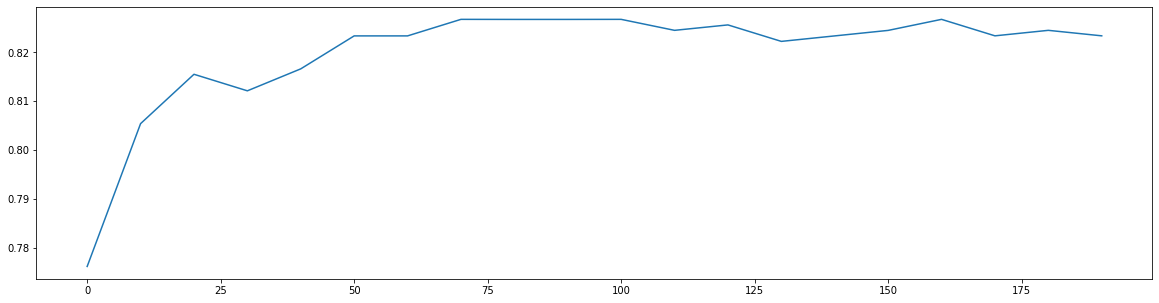

In [67]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=90)
    score = cross_val_score(rfc,x,y2.ravel(),cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10))
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

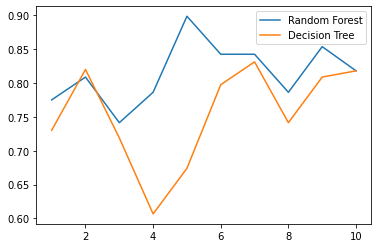

In [69]:
rfc = RandomForestClassifier(n_estimators=100)
rfc_s = cross_val_score(rfc,x,y2.ravel(),cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,x,y2.ravel(),cv=10)

plt.plot(range(1,11),rfc_s,label = "Random Forest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

## K邻近算法